In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv("salesweekly[1].csv")

In [ ]:
X = data.drop("R06",axis=1)   
y = data["R06"] 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape


((211, 8), (91, 8))

In [ ]:
X_train.corr()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03
M01AB,1.000000,0.254863,0.164491,0.220072,-0.088831,0.019887,0.101806
M01AE,0.254863,1.000000,0.276806,0.412793,0.110345,-0.008004,0.227018
N02BA,0.164491,0.276806,1.000000,0.356565,0.258900,0.071357,-0.117576
N02BE,0.220072,0.412793,0.356565,1.000000,0.060598,0.056709,0.404329
N05B,-0.088831,0.110345,0.258900,0.060598,1.000000,0.304514,-0.033402
N05C,0.019887,-0.008004,0.071357,0.056709,0.304514,1.000000,0.132445
R03,0.101806,0.227018,-0.117576,0.404329,-0.033402,0.132445,1.000000


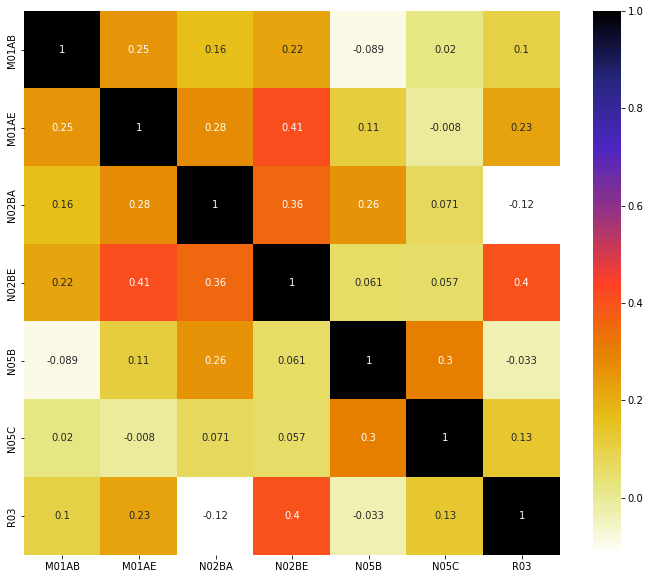

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X_train, 0.35)
len(set(corr_features))

2

In [ ]:
corr_features

{'N02BE', 'R03'}

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)


,datum,M01AB,M01AE,N02BA,N05B,N05C
225,4/29/2018,50.67,25.443,25.05,60.0,3.0
152,12/4/2016,34.18,25.265,19.95,52.0,2.0
228,5/20/2018,27.69,24.286,17.00,59.0,7.0
201,11/12/2017,40.52,25.356,27.45,44.0,3.0
52,1/4/2015,36.68,34.540,24.70,65.0,7.0
...,...,...,...,...,...,...
253,11/11/2018,39.99,19.789,34.55,70.0,5.0
292,8/11/2019,40.99,19.219,21.30,57.0,8.0
76,6/21/2015,41.67,23.040,35.76,52.0,3.0
272,3/24/2019,35.99,20.661,13.95,68.4,2.0
